In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
import sys
import openpyxl

In [3]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

#### Selection of the second phase of substances from the 430 PFAS testing library

In [4]:
df = pd.read_excel(external_dir+'PFAS_inventory_211118.xlsx')

In [6]:
df.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,...,TOX21SL,TOXCAST,TOXCAST_E1K,TOXCAST_PH1V2,TOXCAST_PH2,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF
0,DTXSID00188993,DSSTox_Substance_Id,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,-,-,-,...,-,-,-,-,-,-,-,-,-,-
1,DTXSID00188998,DSSTox_Substance_Id,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,-,-,-,...,-,-,-,-,-,-,-,-,-,-
2,DTXSID00190950,DSSTox_Substance_Id,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,-,-,-,...,-,-,-,-,-,-,-,-,-,-
3,DTXSID00192353,DSSTox_Substance_Id,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.18,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,DTXSID00194615,DSSTox_Substance_Id,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [8]:
#df.info()

In [9]:
pfas271 =pd.read_excel(external_dir+'PFAS_240518_v2.xlsx')

In [10]:
new_nom = pd.read_excel(external_dir+'Nomination_Phase2.xlsx')

In [11]:
pfas271 = pfas271.rename(columns = {'DSSTox_Substance_Id' : 'DTXSID'})

In [12]:
pfas430 = pd.merge(df,pfas271, on='DTXSID', how = 'left')

In [13]:
pfas430.columns

Index(['INPUT', 'FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'CASRN',
       'MOLECULAR_FORMULA', 'AVERAGE_MASS', 'TOXVAL_DATA',
       'TOXCAST_PERCENT_ACTIVE', 'TOXCAST_NUMBER_OF_ASSAYS/TOTAL',
       'QSAR_READY_SMILES', 'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK',
       'PPRTV_LINK',
       'ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED',
       'BIOCONCENTRATION_FACTOR_OPERA_PRED',
       'BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED',
       'BOILING_POINT_DEGC_OPERA_PRED', 'HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED',
       'OPERA_KM_DAYS_OPERA_PRED',
       'OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED',
       'SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFAS75S1',
       'EPAPFASCAT', 'PFASOECD', 'TOX21SL', 

In [14]:
pfas430.drop(['INPUT', 'FOUND_BY','Preferred.Name', 'Substance_CASRN_old', 'Substance_CASRN',
       'Structure_SMILES_2D.QSAR','Status_060218', 'Status', 'TxCst', 'ToxVal',
       'n(TxVal_record)', 'AVERAGE.MASS', 'LogKow_OPERA',
       'VAPOR_PRESSURE.MMHG.OPERA.PRED', 'Sol_mol.L_OPERA', 'Water_sol_mg.L',
       'Structural_diversity.within.Category', 'Data_Availability',
       'Data_Quantity', 'Read.across.impact', 'Status_numeric', 'Physchem',
       'Workflow_Step', 'Other_Tech_considerations_post_procurement',
       'Total_Score', 'Select_for_testing_060218', 'Target.Source_060218',
       'Comment_re_selection_060218', 'New_selections_200418',
       'T_S_Role_New_200418', 'Rejected_from_consideration_200418',
       'Insoluble(1)_lowsolubility(2)_soluble(3)_NK(4)',
       'Physical_form_properties', 'Weighing_issues',
       'Available_known_solubles (1)', 'AR_NOTE', 'Max_Solub_DMSO',
       'DTXSID_Avail_HighC-DMSO','ATMOSPHERIC_HYDROXYLATION_RATE_(AOH)_CM3/MOLECULE*SEC_OPERA_PRED','BIOCONCENTRATION_FACTOR_OPERA_PRED','BIODEGRADATION_HALF_LIFE_DAYS_DAYS_OPERA_PRED','HENRYS_LAW_ATM-M3/MOLE_OPERA_PRED', 'OPERA_KM_DAYS_OPERA_PRED','OCTANOL_AIR_PARTITION_COEFF_LOGKOA_OPERA_PRED','SOIL_ADSORPTION_COEFFICIENT_KOC_L/KG_OPERA_PRED'], axis = 1, inplace = True)

In [15]:
pfas430.head()

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,TOXCAST_PH1V2,TOXCAST_PH2,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Structural_SubCategory,Structural_Category,Final_sent_4testing_240518
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,-,-,-,CC(=O)C(F)(F)C(F)(F)C(F)(F)F,-,...,-,-,-,-,-,-,-,Perfluoroalkyl ketones,Perfluoroalkyl ketones,4.0
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,-,-,-,FC(F)=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,-,...,-,-,-,-,-,-,-,NaN,NaN,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,-,-,-,OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,-,...,-,-,-,-,-,-,-,n:1 Fluorotelomer alcohols,Fluorotelomer alcohols,2.0
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.18,-,-,-,OS(=O)(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,-,...,-,-,-,-,-,-,-,n:2 Fluorotelomer sulfonic acids,Fluorotelomer sulfonates,0.0
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,-,-,-,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,-,...,-,-,-,-,-,-,-,NaN,NaN,NaN


In [16]:
pfas430.replace({'Y':1, '-': np.nan}, inplace = True)

In [17]:
final_df = pd.merge(pfas430,new_nom, on='DTXSID', how = 'left')

In [18]:
final_df

,DTXSID,PREFERRED_NAME_x,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,Unnamed: 1014,Unnamed: 1015,Unnamed: 1016,Unnamed: 1017,Unnamed: 1018,Unnamed: 1019,Unnamed: 1020,Unnamed: 1021,Unnamed: 1022,Unnamed: 1023
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,NaN,NaN,NaN,CC(=O)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,NaN,NaN,NaN,FC(F)=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,NaN,NaN,NaN,OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,NaN,NaN,NaN,OS(=O)(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,NaN,NaN,NaN,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID10859667,Perfluorooctanesulfonamido ammonium,70225-25-1,C14H16F17N2O2S,599.330,NaN,NaN,NaN,C[N+](C)(C)CCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,DTXSID1047578,"1,1,1,2,2,3,3,4,4-Nonafluoro-6-iodohexane",2043-55-2,C6H4F9I,373.988,NaN,0.88,1/113,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,DTXSID2032421,Lithium perfluorooctanesulfonate,29457-72-5,C8F17LiO3S,506.060,1.0,6.9,8/116,OS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433,DTXSID3044419,Lithium trifluoromethanesulfonate,33454-82-9,CF3LiO3S,156.000,NaN,NaN,NaN,OS(=O)(=O)C(F)(F)F,446.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
final_df = final_df.drop(['PREFERRED_NAME_y'], axis = 1)

In [20]:
final_df.rename(columns = {'PREFERRED_NAME_x':'PREFERRED_NAME'},inplace = True)

In [21]:
final_df.columns.get_loc('Unnamed: 4')

41

In [22]:
final_df = final_df.iloc[:,:41]

In [23]:
cats = pd.read_csv(external_dir+'Markush_Categories_161118.csv')

In [24]:
cats.preferred_name.nunique()

57

In [25]:
cats_grpby = cats.groupby(['preferred_name'])

In [26]:
cat_dict = {}
for x,y in cats_grpby:
    k = [e for e in y['preferred_name'] if e!= ' '][0]
    v = set(y['dsstox_substance_id'])
    cat_dict[k]=v

In [27]:
#cat_dict

In [28]:
final_df.head()

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Structural_SubCategory,Structural_Category,Final_sent_4testing_240518,TSCA_OPPT-PFAS_overlap,Nominated for EPAPFAS75S2
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,NaN,NaN,NaN,CC(=O)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,Perfluoroalkyl ketones,Perfluoroalkyl ketones,4.0,NaN,0
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,NaN,NaN,NaN,FC(F)=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,NaN,NaN,NaN,OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,n:1 Fluorotelomer alcohols,Fluorotelomer alcohols,2.0,NaN,1
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,NaN,NaN,NaN,OS(=O)(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,n:2 Fluorotelomer sulfonic acids,Fluorotelomer sulfonates,0.0,NaN,1
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,NaN,NaN,NaN,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [43]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('PFAS_430_211118.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
final_df.to_excel(writer)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [29]:
mancats = final_df[~final_df['Structural_Category'].isnull()]

In [30]:
mancats_grp = mancats.groupby(['Structural_Category'])

In [31]:
mancats_dict = {}
for x,y in mancats_grp:
    k = [e for e in y['Structural_Category'] if e!= ' '][0]
    v = set(y['DTXSID'])
    mancats_dict[k]=v

In [32]:
d2 = cat_dict 
d1 = mancats_dict 

In [33]:
matches =  {k1:[x for x, y in d2.items() if d1[k1] & y == y] for k1 in d1.keys()}

In [34]:
matches_df = pd.DataFrame(list(matches.items()), columns = ['Original_Manual_Category', 'Markush_Category'])

In [35]:
matches_df.head()

,Original_Manual_Category,Markush_Category
0,Fluorotelomer acrylates,[]
1,Fluorotelomer alcohols,[]
2,Fluorotelomer amines,[]
3,Fluorotelomer carboxylates,[]
4,Fluorotelomer phosphate esters,[]


In [36]:
markush_manual =  {k2:[x for x, y in d1.items() if d2[k2] & y == y] for k2 in d2.keys()}

In [37]:
#markush_manual

In [38]:
markush_man_df = pd.DataFrame(list(markush_manual.items()), columns = ['Markush_Category','Original_Manual_Category'])

In [39]:
markush_man_df.head()

,Markush_Category,Original_Manual_Category
0,Fluorotelomer (linear) acrylates,[]
1,Fluorotelomer (linear) acrylates (-CHF2),[]
2,Fluorotelomer (linear) alcohols,[]
3,Fluorotelomer (linear) alcohols (-CHF2),[]
4,Fluorotelomer (linear) alkyl (linear) ketone,[]


In [40]:
d3 = {}
for x,y in cats.groupby(['dsstox_substance_id']):
    k = [e for e in y['dsstox_substance_id'] if e!= ' '][0]
    v = set(y['preferred_name'])
    d3[k]=v

In [41]:
#d3

In [42]:
markush_matches = {k:d3[k] for k in final_df['DTXSID'] if k in d3}

In [43]:
markush_430 = pd.DataFrame(list(markush_matches.items()), columns = ['DTXSID', 'Markush_Category'])

In [44]:
PFAS430 = pd.merge(final_df,markush_430, on='DTXSID', how = 'left')

In [45]:
PFAS430

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Structural_SubCategory,Structural_Category,Final_sent_4testing_240518,TSCA_OPPT-PFAS_overlap,Nominated for EPAPFAS75S2,Markush_Category
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,NaN,NaN,NaN,CC(=O)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,Perfluoroalkyl ketones,Perfluoroalkyl ketones,4.0,NaN,0,{Perfluoroalkyl (linear) alkyl (linear) ketone}
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,NaN,NaN,NaN,FC(F)=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,NaN,NaN,NaN,OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,n:1 Fluorotelomer alcohols,Fluorotelomer alcohols,2.0,NaN,1,{Fluorotelomer (linear) alcohols}
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,NaN,NaN,NaN,OS(=O)(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,n:2 Fluorotelomer sulfonic acids,Fluorotelomer sulfonates,0.0,NaN,1,{Fluorotelomer (linear) sulfonic acids}
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,NaN,NaN,NaN,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"{Fluorotelomer (linear) acrylates (-CHF2), Flu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID10859667,Perfluorooctanesulfonamido ammonium,70225-25-1,C14H16F17N2O2S,599.330,NaN,NaN,NaN,C[N+](C)(C)CCCNS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
431,DTXSID1047578,"1,1,1,2,2,3,3,4,4-Nonafluoro-6-iodohexane",2043-55-2,C6H4F9I,373.988,NaN,0.88,1/113,FC(F)(F)C(F)(F)C(F)(F)C(F)(F)CCI,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0,NaN
432,DTXSID2032421,Lithium perfluorooctanesulfonate,29457-72-5,C8F17LiO3S,506.060,1.0,6.9,8/116,OS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...,NaN,...,NaN,NaN,1.0,NaN,Perfluoroalkane sulfonic acids,Perfluoroalkane sulfonates,0.0,1.0,0,NaN
433,DTXSID3044419,Lithium trifluoromethanesulfonate,33454-82-9,CF3LiO3S,156.000,NaN,NaN,NaN,OS(=O)(=O)C(F)(F)F,446.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,0,NaN


In [49]:
oecd_raw = pd.read_excel(external_dir+'OECD_PFAS_rawdata.xlsx')

In [50]:
oecd_raw.columns

Index(['ID', 'CAS Number', 'Chemical Name', 'Synonyms', 'Molecular Formula',
       'SMILES', 'Previously used CAS Number', 'Structure Category',
       'Structure Category Name', 'Number of Functional Groups',
       'Perfluoroalkyl Chain Length', 'Linear vs. Branched Isomer',
       '(Potential) precursor to PFAAs in the environment/biota', 'Polymer',
       'Mixture', 'Related Chemicals',
       'Uncertainty in Structure Categorisation', 'Note', 'Regulatory Status',
       'KEMI', 'Scifinder', 'OECD 2007 List', 'Australian AICS',
       'Australian IMAP Tier 2', 'Canadian DSL', 'Canada PCTSR 2012',
       'China IECSC', 'Japan ENCS',
       'Japan Examples of PFOA Stockholm Convention',
       'EU REACH Pre-registered', 'EU REACH Registered', 'SPIN',
       'US EPA TSCA Inventory', 'US EPA IUR 1986-2002', 'US EPA IUR 2006',
       'US EPA CDR 2012', 'US EPA CDR 2016', 'US FDA FCS', 'US EPA TSCA 12b',
       'Unnamed: 39', 'Unnamed: 40'],
      dtype='object')

In [51]:
oecd_raw.drop(['Chemical Name', 'Synonyms', 'Molecular Formula',
       'SMILES', 'Previously used CAS Number','Number of Functional Groups',
       'Perfluoroalkyl Chain Length', 'Linear vs. Branched Isomer',
       '(Potential) precursor to PFAAs in the environment/biota', 'Polymer',
       'Mixture', 'Related Chemicals',
       'Uncertainty in Structure Categorisation', 'Note', 'Regulatory Status',
       'KEMI', 'Scifinder', 'OECD 2007 List', 'Australian AICS',
       'Australian IMAP Tier 2', 'Canadian DSL', 'Canada PCTSR 2012',
       'China IECSC', 'Japan ENCS',
       'Japan Examples of PFOA Stockholm Convention',
       'EU REACH Pre-registered', 'EU REACH Registered', 'SPIN',
       'US EPA TSCA Inventory', 'US EPA IUR 1986-2002', 'US EPA IUR 2006',
       'US EPA CDR 2012', 'US EPA CDR 2016', 'US FDA FCS', 'US EPA TSCA 12b',
       'Unnamed: 39', 'Unnamed: 40' ],axis = 1, inplace = True)

In [52]:
oecd_raw.rename(columns = {'CAS Number':'CASRN'}, inplace = True)

In [53]:
oecd_curated = pd.read_excel(external_dir+'OECD_PFAS.xlsx')

In [54]:
oecd_curated.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,CASRN,PFASOECD
0,DTXSID00108075,DSSTox_Substance_Id,DTXSID00108075,"Ethene, tetrafluoro-, oxidized, polymd., reduc...",274917-96-3,Y
1,DTXSID00108095,DSSTox_Substance_Id,DTXSID00108095,"Sulfonamides, C4-8-alkane, perfluoro, N-ethyl-...",160901-25-7,Y
2,DTXSID00108732,DSSTox_Substance_Id,DTXSID00108732,"1-Propene, 1,1,2,3,3,3-hexafluoro-, polymer wi...",149935-01-3,Y
3,DTXSID00145182,DSSTox_Substance_Id,DTXSID00145182,"1H,1H,2H,2H-Perfluorooctyldimethylchlorosilane",102488-47-1,Y
4,DTXSID00166413,DSSTox_Substance_Id,DTXSID00166413,Perfluoro(2-methylpent-2-ene),1584-03-8,Y


In [55]:
oecd_curated.drop(['INPUT','FOUND_BY','PFASOECD'], axis =1, inplace = True)

In [56]:
oecdwcats = pd.merge(oecd_curated, oecd_raw, on='CASRN', how = 'left')

In [57]:
pfas430woecd = pd.merge(PFAS430, oecdwcats, on='CASRN', how = 'left')

In [58]:
pfas430woecd.columns

Index(['DTXSID_x', 'PREFERRED_NAME_x', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TOXVAL_DATA', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFAS75S1',
       'EPAPFASCAT', 'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K',
       'TOXCAST_PH1V2', 'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI',
       'TOXCAST_PHASEII', 'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF',
       'Structural_SubCategory', 'Structural_Category',
       'Final_sent_4testing_240518', 'TSCA_OPPT-PFAS_overlap',
       'Nominated for EPAPFAS75S2', 'Markush_Category', 'DTXSID_y',
       'PREFERRED_NAME_y', 'ID', '

In [59]:
pfas430woecd.drop(columns = ['DTXSID_y',
       'PREFERRED_NAME_y', 'ID', 'Structure Category',], axis = 1, inplace = True)

In [60]:
pfas430woecd.rename(columns = {'DTXSID_x': 'DTXSID','PREFERRED_NAME_x': 'PREFERRED_NAME' }, inplace = True)

In [61]:
len(pfas430woecd['Structure Category Name'].unique())

62

In [62]:
len(pfas430woecd[ (pfas430woecd['Structure Category Name'].isnull()) & (pfas430woecd['Markush_Category'].isnull())& (pfas430woecd['Structural_Category'].isnull()) ])

27

In [63]:
pfas430woecd[ (pfas430woecd['Structure Category Name'].isnull()) & (pfas430woecd['Markush_Category'].isnull())& (pfas430woecd['Structural_Category'].isnull()) ]

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Structural_SubCategory,Structural_Category,Final_sent_4testing_240518,TSCA_OPPT-PFAS_overlap,Nominated for EPAPFAS75S2,Markush_Category,Structure Category Name
34,DTXSID00620545,"N,N-dimethyl-2H-perfluoroethanamine",1550-50-1,C4H7F4N,145.101,NaN,NaN,NaN,CN(C)C(F)(F)C(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
41,DTXSID00880187,"3,5,7,8-Tetrachloroperfluorooctanoic acid",2923-68-4,C8HCl4F11O2,479.880,NaN,NaN,NaN,OC(=O)C(F)(F)C(F)(Cl)C(F)(F)C(F)(Cl)C(F)(F)C(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
73,DTXSID10880178,Hexafluoroisopropyl acrylate,2160-89-6,C6H4F6O2,222.086,NaN,NaN,NaN,FC(F)(F)C(OC(=O)C=C)C(F)(F)F,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN,NaN
106,DTXSID20880144,Ethyl pentafluoropropionyl acetate,663-35-4,C7H7F5O3,234.122,NaN,NaN,NaN,CCOC(=O)CC(=O)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
110,DTXSID30175730,"4H,4H-Perfluoro-6,6-dimethylheptane-3,5-dione",2145-68-8,C9H11F5O2,246.177,NaN,NaN,NaN,CC(C)(C)C(=O)CC(=O)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
116,DTXSID30235085,"2,4,6-Tris(pentafluoroethyl)-1,3,5-triazine",858-46-8,C9F15N3,435.096,NaN,NaN,NaN,FC(F)(F)C(F)(F)C1=NC(=NC(=N1)C(F)(F)C(F)(F)F)C...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
120,DTXSID3032620,Hexaflumuron,86479-06-3,C16H8Cl2F6N2O3,461.140,1.0,2.03,11/542,FC(F)C(F)(F)OC1=C(Cl)C=C(NC(=O)NC(=O)C2=C(F)C=...,49.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
150,DTXSID30869884,"2H,3H-Decafluoropentane",138495-42-8,C5H2F10,252.055,1.0,NaN,NaN,FC(C(F)C(F)(F)C(F)(F)F)C(F)(F)F,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,0,NaN,NaN
162,DTXSID40337468,"1,1,2,2-Tetrafluoro-3-iodopropane",679-87-8,C3H3F4I,241.955,NaN,NaN,NaN,FC(F)C(F)(F)CI,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
171,DTXSID40381986,2-Allyloxyperfluoroethanesulfonyl fluoride,73606-13-0,C5H5F5O3S,240.140,NaN,NaN,NaN,FC(F)(OCC=C)C(F)(F)S(F)(=O)=O,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [64]:
toxval = pd.read_excel(external_dir+'ToxVal_humanhealth_DTXSID.xlsx')

In [65]:
toxval.columns

Index(['toxval_id', 'chemical_id', 'chemical_id_original', 'species_id',
       'study_id', 'quality_id', 'priority_id', 'record_id',
       'parent_record_id', 'manual_qc_flag', 'source', 'subsource',
       'source_url', 'subsource_url', 'record_url', 'source_source_id',
       'toxval_type', 'toxval_type_original', 'toxval_subtype',
       'toxval_subtype_original', 'toxval_numeric_converted', 'toxval_numeric',
       'toxval_numeric_original', 'toxval_numeric_qualifier',
       'toxval_numeric_qualifier_original', 'toxval_units_converted',
       'toxval_units', 'toxval_units_original', 'risk_assessment_class',
       'study_type', 'study_type_original', 'study_duration_class',
       'study_duration_class_original', 'study_duration_value',
       'study_duration_value_original', 'study_duration_units',
       'study_duration_units_original', 'species_original', 'strain',
       'strain_original', 'sex', 'sex_original', 'population',
       'exposure_route', 'exposure_route_origina

In [66]:
toxval.shape

(271124, 66)

In [67]:
toxval.toxval_units.unique()

array(['ppm', 'mg/kg-day', 'mg/m3', 'ug/kg-day', 'ng/m3', 'ug/m3', 'mSv',
       'mSv/year', 'fibers/cm3', 'mg/L', '(ug/m3)-1', '(mg/kg-day)-1',
       '-', '%', 'mg/kg', 'mg/ml', 'mM', 'mg/plate', '% diet', 'water %',
       'ml', 'M', 'mg', 'g/day', 'mL/kg', 'ng/cell', 'mmol', 'g/kg',
       'fibers/L', 'mg/cm2-day', 'undefined', 'unspecified', 'ug/L',
       'g/L', 'mg/m2', '(mg/L)-1', '(mg/m3)-1', 'MFL', 'pCi/L', 'uM',
       'ug', 'unitless', 'umol/kg', 'mg/day', 'ug/day', 'mg% thigh bone',
       'mmol/kg-day', '%(CrO3)', 'ppb', 'g/kg-day', 'g/ml', 'ul/kg',
       'umol', 'mmol/kg', 'ul/kg-day', 'g/m3', 'ml/kg-day', 'ul/L',
       'mg/cm2', 'iu/kg', '(g/m3)-1', 'ug/mL', '% w/w', 'mg/organism-day',
       'mg/org', 'g/org', 'lb/acre', '% w/v', 'ng', 'ug/org-day',
       'ul/org', 'NR', 'ppm/d', 'oz/lbs bdwt', 'N', 'mg/g', 'g',
       'nmol/org', 'g/g', 'ul', 'nmol/g', 'nmol', 'g/ton', 'ng/g',
       'mmol/kg-hr', 'ug/ul/h', 'day', 'cm3', 'ml/org', 'units',
       'ug/kg-mi', '% v/

In [68]:
pfasids = list(pfas430woecd['DTXSID'])

In [69]:
txval_pfas = toxval[toxval['dsstox_substance_id'].isin(pfasids)]

In [70]:
txval_pfas.columns

Index(['toxval_id', 'chemical_id', 'chemical_id_original', 'species_id',
       'study_id', 'quality_id', 'priority_id', 'record_id',
       'parent_record_id', 'manual_qc_flag', 'source', 'subsource',
       'source_url', 'subsource_url', 'record_url', 'source_source_id',
       'toxval_type', 'toxval_type_original', 'toxval_subtype',
       'toxval_subtype_original', 'toxval_numeric_converted', 'toxval_numeric',
       'toxval_numeric_original', 'toxval_numeric_qualifier',
       'toxval_numeric_qualifier_original', 'toxval_units_converted',
       'toxval_units', 'toxval_units_original', 'risk_assessment_class',
       'study_type', 'study_type_original', 'study_duration_class',
       'study_duration_class_original', 'study_duration_value',
       'study_duration_value_original', 'study_duration_units',
       'study_duration_units_original', 'species_original', 'strain',
       'strain_original', 'sex', 'sex_original', 'population',
       'exposure_route', 'exposure_route_origina

In [71]:
txval_pfas.drop(['toxval_id', 'chemical_id', 'chemical_id_original', 'species_id',
       'study_id', 'quality_id', 'priority_id', 'record_id',
       'parent_record_id', 'manual_qc_flag'],axis = 1, inplace = True)

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [72]:
txval_pfas

,source,subsource,source_url,subsource_url,record_url,source_source_id,toxval_type,toxval_type_original,toxval_subtype,toxval_subtype_original,...,critical_effect,chemical_id.1,chemical_id_final,casrn,source_name,name,dsstox_substance_id,dsstox_compound_id,chemical_id_external,qsar_ready_smiles
264,ATSDR,CDC,https://www.atsdr.cdc.gov/mrls/mrllist.asp,-,-,-1,NOAEL,NOAEL,-,-,...,hepatic,12,NaN,1763-23-1,PERFLUOROOCTANE SULFONIC ACID (PFOS),Perfluorooctanesulfonic acid,DTXSID3031864,DTXCID1011864,92be2e80db536fec7126d1dbcfd671d3,OS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...
265,ATSDR,CDC,https://www.atsdr.cdc.gov/mrls/mrllist.asp,-,-,-1,MRL,ATSDR MRL,-,-,...,hepatic,12,NaN,1763-23-1,PERFLUOROOCTANE SULFONIC ACID (PFOS),Perfluorooctanesulfonic acid,DTXSID3031864,DTXCID1011864,92be2e80db536fec7126d1dbcfd671d3,OS(=O)(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C...
340,ATSDR,CDC,https://www.atsdr.cdc.gov/mrls/mrllist.asp,-,-,-1,NOAEL,NOAEL,-,-,...,hepatic,10,NaN,335-67-1,PERFLUOROOCTANOIC ACID (PFOA),Perfluorooctanoic acid,DTXSID8031865,DTXCID6011865,c9b72374fb696313feb47357de67940d,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...
341,ATSDR,CDC,https://www.atsdr.cdc.gov/mrls/mrllist.asp,-,-,-1,MRL,ATSDR MRL,-,-,...,hepatic,10,NaN,335-67-1,PERFLUOROOCTANOIC ACID (PFOA),Perfluorooctanoic acid,DTXSID8031865,DTXCID6011865,c9b72374fb696313feb47357de67940d,OC(=O)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(...
15650,DOD,TG 230 Military Exposure Guidelines Table,https://phc.amedd.army.mil/Pages/Library.aspx?...,-,-,-1,MEG,MEG,Short-term Negligible Air,Short-term Negligible Air,...,-,5567,NaN,138495-42-8,"Decafluoropentane, 1,1,1,2,3,4,4,5,5,5-","2H,3H-Decafluoropentane",DTXSID30869884,DTXCID70817783,e55de231fbd7d5584ac969b5be3c1c26,FC(C(F)C(F)(F)C(F)(F)F)C(F)(F)F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268621,EFSA,OpenFoodTox,https://zenodo.org/record/1252752#.W-WNgDNReHs,-,http://dx.doi.org/10.2903/j.efsa.2017.4976,-1,NOEL,NOEL,-,-,...,not reported,6771,NaN,76-05-1,Trifluoroacetic acid; (Trifluoroethanoic acid),Trifluoroacetic acid,DTXSID9041578,DTXCID7021578,e7d3fcd180eb0659aa258908fee3d015,OC(=O)C(F)(F)F
268622,EFSA,OpenFoodTox,https://zenodo.org/record/1252752#.W-WNgDNReHs,-,http://dx.doi.org/10.2903/j.efsa.2017.4976,-1,ADI,ADI,-,-,...,-,6771,NaN,76-05-1,Trifluoroacetic acid; (Trifluoroethanoic acid),Trifluoroacetic acid,DTXSID9041578,DTXCID7021578,e7d3fcd180eb0659aa258908fee3d015,OC(=O)C(F)(F)F
268623,EFSA,OpenFoodTox,https://zenodo.org/record/1252752#.W-WNgDNReHs,-,http://dx.doi.org/10.2903/j.efsa.2017.4976,-1,NOAEL,NOAEL,-,-,...,organ weights,6771,NaN,76-05-1,Trifluoroacetic acid; (Trifluoroethanoic acid),Trifluoroacetic acid,DTXSID9041578,DTXCID7021578,e7d3fcd180eb0659aa258908fee3d015,OC(=O)C(F)(F)F
268624,EFSA,OpenFoodTox,https://zenodo.org/record/1252752#.W-WNgDNReHs,-,http://dx.doi.org/10.2903/j.efsa.2017.4976,-1,LD50,LD50,-,-,...,mortality,6771,NaN,76-05-1,Trifluoroacetic acid; (Trifluoroethanoic acid),Trifluoroacetic acid,DTXSID9041578,DTXCID7021578,e7d3fcd180eb0659aa258908fee3d015,OC(=O)C(F)(F)F


In [73]:
txval_pfas_grpby = txval_pfas.groupby(['dsstox_substance_id']).nunique()

In [74]:
txval_pfas_grpby.rename(columns = {'dsstox_substance_id':'DTXSID'}, inplace = True)

In [75]:
txval_pfas_grpby =txval_pfas_grpby.reset_index()

In [76]:
txval_pfas_grpby.head()

,dsstox_substance_id,source,subsource,source_url,subsource_url,record_url,source_source_id,toxval_type,toxval_type_original,toxval_subtype,...,details_text,critical_effect,chemical_id.1,chemical_id_final,casrn,source_name,name,dsstox_compound_id,chemical_id_external,qsar_ready_smiles
0,DTXSID0059794,1,1,1,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,1,0
1,DTXSID1022134,4,4,4,1,2,4,6,6,8,...,3,4,1,0,1,1,1,1,1,1
2,DTXSID1032646,3,2,3,1,2,2,5,5,1,...,2,2,1,0,1,1,1,1,1,1
3,DTXSID1061073,2,2,2,1,1,1,4,4,6,...,1,1,1,0,1,1,1,1,1,0
4,DTXSID2044397,4,4,4,1,2,5,7,7,9,...,3,3,1,0,1,1,1,1,1,1


In [77]:
txval_pfas_ = txval_pfas_grpby.iloc[:,[0,13]]

In [78]:
txval_pfas_.rename(columns = {'toxval_numeric_original':'nTxVal'}, inplace = True)

/home/grace/anaconda3/envs/pfas_dap/lib/python3.8/site-packages/pandas/core/frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [79]:
txval_pfas_.columns = ['DTXSID', 'nTxVal']

In [80]:
final_pfas430 = pd.merge(pfas430woecd, txval_pfas_, on = 'DTXSID', how = 'left')

In [81]:
final_pfas430.head()

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TOXVAL_DATA,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,QSAR_READY_SMILES,NUMBER_OF_PUBMED_ARTICLES,...,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Structural_SubCategory,Structural_Category,Final_sent_4testing_240518,TSCA_OPPT-PFAS_overlap,Nominated for EPAPFAS75S2,Markush_Category,Structure Category Name,nTxVal
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,NaN,NaN,NaN,CC(=O)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,Perfluoroalkyl ketones,Perfluoroalkyl ketones,4.0,NaN,0,{Perfluoroalkyl (linear) alkyl (linear) ketone},semi-fluorinated ketons,NaN
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,NaN,NaN,NaN,FC(F)=C(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,perfluoroalkenes & derivatives,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,NaN,NaN,NaN,OCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F,NaN,...,NaN,NaN,n:1 Fluorotelomer alcohols,Fluorotelomer alcohols,2.0,NaN,1,{Fluorotelomer (linear) alcohols},n:1 fluorotelomer alcohols,NaN
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,NaN,NaN,NaN,OS(=O)(=O)CCC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,n:2 Fluorotelomer sulfonic acids,Fluorotelomer sulfonates,0.0,NaN,1,{Fluorotelomer (linear) sulfonic acids},n:2 fluorotelomer sulfonic acids (n:2 FTSAs),NaN
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,NaN,NaN,NaN,FC(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,"{Fluorotelomer (linear) acrylates (-CHF2), Flu...",1-H n:1 FT,NaN


In [82]:
final_pfas430.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TOXVAL_DATA', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFAS75S1',
       'EPAPFASCAT', 'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K',
       'TOXCAST_PH1V2', 'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI',
       'TOXCAST_PHASEII', 'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF',
       'Structural_SubCategory', 'Structural_Category',
       'Final_sent_4testing_240518', 'TSCA_OPPT-PFAS_overlap',
       'Nominated for EPAPFAS75S2', 'Markush_Category',
       'Structure Category Name', 'nTxVal'],
     

In [83]:
final_pfas430 = final_pfas430[['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TOXVAL_DATA', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory', 'Structural_Category','Markush_Category',
       'Structure Category Name','Nominated for EPAPFAS75S2','EPAPFAS75S1','TSCA_OPPT-PFAS_overlap','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED','VAPOR_PRESSURE_MMHG_OPERA_PRED','QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED',
       
       'MELTING_POINT_DEGC_OPERA_PRED', 
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 
       'EPAPFASCAT', 'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K',
       'TOXCAST_PH1V2', 'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI',
       'TOXCAST_PHASEII', 'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF',
       'Final_sent_4testing_240518' ]]

In [84]:
final_pfas430['TxVal'] =  np.where(final_pfas430['nTxVal']>0, 1, 0)

In [85]:
final_pfas430.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TOXVAL_DATA', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name',
       'Nominated for EPAPFAS75S2', 'EPAPFAS75S1', 'TSCA_OPPT-PFAS_overlap',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518',
       'TxVal'],
   

In [86]:
final_pfas430 =final_pfas430[['DTXSID', 'PREFERRED_NAME', 'CASRN','TOXVAL_DATA', 'TxVal',
       'nTxVal', 'TOXCAST_PERCENT_ACTIVE', 'TOXCAST_NUMBER_OF_ASSAYS/TOTAL',
       'Structural_SubCategory', 'Structural_Category', 'Markush_Category',
       'Structure Category Name', 'EPAPFAS75S1', 'Final_sent_4testing_240518',
       'Nominated for EPAPFAS75S2', 'QSAR_READY_SMILES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD']]

In [87]:
final_pfas430['nTxVal'] = final_pfas430['nTxVal'].replace(np.nan,0)

In [88]:
final_pfas430.drop(['TOXVAL_DATA'], axis = 1, inplace = True)

In [126]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('final_pfas430_211118.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
final_pfas430.to_excel(writer, sheet_name='final_pfas430')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [89]:
final_pfas430.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'TxVal', 'nTxVal',
       'TOXCAST_PERCENT_ACTIVE', 'TOXCAST_NUMBER_OF_ASSAYS/TOTAL',
       'Structural_SubCategory', 'Structural_Category', 'Markush_Category',
       'Structure Category Name', 'EPAPFAS75S1', 'Final_sent_4testing_240518',
       'Nominated for EPAPFAS75S2', 'QSAR_READY_SMILES', 'IRIS_LINK',
       'PPRTV_LINK', 'BOILING_POINT_DEGC_OPERA_PRED',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT', 'PFASOECD'],
      dtype='object')

In [90]:
pfas430_rev = pd.read_excel(external_dir+'final_pfas430_211118_REV.xlsx')

In [91]:
pfas430_rev.head()
pfas430_rev.drop('Unnamed: 0', axis = 1, inplace = True)
pfas430_rev.head()

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TxVal,nTxVal,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,Structural_SubCategory,...,TOXCAST,TOXCAST_E1K,TOXCAST_PH1V2,TOXCAST_PH2,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Final_sent_4testing_240518
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,0,0,NaN,NaN,n:1 Fluorotelomer alcohols,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,0,0,NaN,NaN,n:2 Fluorotelomer sulfonic acids,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
pfas430_rev['Markush_Category'] = ['missing' if x is np.nan else x for x in pfas430_rev['Markush_Category']]
pfas430_rev['Structural_Category'] = ['missing' if x is np.nan else x for x in pfas430_rev['Structural_Category']] 
pfas430_rev['Structure Category Name'] = ['missing' if x is np.nan else x for x in pfas430_rev['Structure Category Name']] 

In [93]:
new_cats = []
for x,y,z in list(zip(pfas430_rev['Markush_Category'],pfas430_rev['Structural_Category'],pfas430_rev['Structure Category Name'])):
    if x != 'missing':
        new_cats.append(x)
    elif y != 'missing':
         new_cats.append(y)
    else:
        new_cats.append(z)
pfas430_rev['Final_Structural_Category'] = new_cats

In [94]:
pfas430_rev.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name',
       'Nominated for EPAPFAS75S2', 'EPAPFAS75S1', 'TSCA_OPPT-PFAS_overlap',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518',
       'Final_Structural_C

In [95]:
pfas430_rev = pfas430_rev[['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name','Final_Structural_Category',
       'Nominated for EPAPFAS75S2', 'EPAPFAS75S1', 'TSCA_OPPT-PFAS_overlap',
       'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518'
       ]]

In [96]:
pfas430_rev

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TxVal,nTxVal,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,Structural_SubCategory,...,TOXCAST,TOXCAST_E1K,TOXCAST_PH1V2,TOXCAST_PH2,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Final_sent_4testing_240518
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
1,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXSID00190950,6:1 Fluorotelomer alcohol,375-82-6,C7H3F13O,350.079,0,0,NaN,NaN,n:1 Fluorotelomer alcohols,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,DTXSID00192353,8:2 Fluorotelomer sulfonic acid,39108-34-4,C10H5F17O3S,528.180,0,0,NaN,NaN,n:2 Fluorotelomer sulfonic acids,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,DTXSID00194615,"1H,1H,9H-Perfluorononyl acrylate",4180-26-1,C12H6F16O2,486.152,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID10859667,Perfluorooctanesulfonamido ammonium,70225-25-1,C14H16F17N2O2S,599.330,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,DTXSID1047578,"1,1,1,2,2,3,3,4,4-Nonafluoro-6-iodohexane",2043-55-2,C6H4F9I,373.988,0,0,0.88,1/113,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
432,DTXSID2032421,Lithium perfluorooctanesulfonate,29457-72-5,C8F17LiO3S,506.060,0,0,6.90,8/116,Perfluoroalkane sulfonic acids,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,0.0
433,DTXSID3044419,Lithium trifluoromethanesulfonate,33454-82-9,CF3LiO3S,156.000,0,0,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN


In [162]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('PFAS430_structural_categories_211118', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
pfas430_rev.to_excel(writer, sheet_name='final set')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [97]:
count_cats = pfas430_rev.groupby(['Final_Structural_Category'])['DTXSID'].count()

In [98]:
count_cats_df = count_cats.to_frame().reset_index()

In [99]:
len(count_cats_df)

127

In [100]:
count_cats_df.rename(columns = {'DTXSID': 'Count'}, inplace = True)

In [101]:
count_cats_df

,Final_Structural_Category,Count
0,1-H perfluoroalkyl carbonyl halides,1
1,Fluorotelomer alcohols,1
2,Fluorotelomer amines,1
3,HFCs and derivatives,6
4,HFEs,2
...,...,...
122,{'Perfluorocarboxyl perfluoroalkyl sulfonic an...,1
123,{'Polyfluoroalkyl (linear) (-CF2H) alkyl (line...,1
124,{'Polyfluoroalkyl (linear) (-CF2H) alkyl (line...,1
125,{'Polyfluoroalkyl (linear) carboxylate esters ...,3


In [102]:
pfas430_rev = pd.merge(pfas430_rev,count_cats_df, on = 'Final_Structural_Category')

In [103]:
txcst = []
for row in pfas430_rev['TOXCAST_PERCENT_ACTIVE']:
    if row >= 0:
        txcst.append(1)
    else:
        txcst.append(0)
pfas430_rev['TxCst'] = txcst


In [104]:
structural_diversity = []
for row in pfas430_rev['Count']:
    if row >= 20:
        structural_diversity.append(1)
    elif row >= 10:
        structural_diversity.append(0.75)
    elif row >= 5:
        structural_diversity.append(0.5)
    elif row >= 2:
        structural_diversity.append(0.25)
    else: 
        structural_diversity.append(0)
pfas430_rev['Structural_Diversity_within_Category'] = structural_diversity

In [105]:
pfas430_rev.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name',
       'Final_Structural_Category', 'Nominated for EPAPFAS75S2', 'EPAPFAS75S1',
       'TSCA_OPPT-PFAS_overlap', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518

In [106]:
ntxval = []
for row in pfas430_rev['nTxVal']:
    if row >=20:
        ntxval.append(1)
    elif row >= 15:
        ntxval.append(0.75)
    elif row >=10:
        ntxval.append(0.5)
    elif row <= 5:
        ntxval.append(0.25)
    else:
        ntxval.append(0)
pfas430_rev['Data_Quantity'] = ntxval

In [107]:
data_avail = []
for x,y in list(zip(pfas430_rev['TxVal'],pfas430_rev['TxCst'])):
    if x == 1 and y == 1:
        data_avail.append(1)
    elif x == 1:
        data_avail.append(0.75)
    elif y == 1:
        data_avail.append(0.5)
    else:
        data_avail.append(0)
pfas430_rev['Data_Availability'] = data_avail

In [108]:
phys_chem = []
for x,y in list(zip(pfas430_rev['OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED'], pfas430_rev['VAPOR_PRESSURE_MMHG_OPERA_PRED'])):
    if x >= 4.5 and y >= 1000:
        phys_chem.append(0)
    elif x >= 4.5 or y >= 1000:
        phys_chem.append(0.25)
    elif x < 4.5 or y < 1000:
        phys_chem.append(0.5)
    else:
        phys_chem.append(0.75)
pfas430_rev['Physchem'] = phys_chem

In [109]:
pfas430_rev

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TxVal,nTxVal,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,Structural_SubCategory,...,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Final_sent_4testing_240518,Count,TxCst,Structural_Diversity_within_Category,Data_Quantity,Data_Availability,Physchem
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,NaN,4.0,4,0,0.25,0.25,0.0,0.50
1,DTXSID00578936,Methyl perfluoropentyl ketone,2708-07-8,C7H3F11O,312.082,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,NaN,4.0,4,0,0.25,0.25,0.0,0.50
2,DTXSID90285748,Methyl perfluoroethyl ketone,374-41-4,C4H3F5O,162.059,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,NaN,3.0,4,0,0.25,0.25,0.0,0.50
3,DTXSID90659945,Ethyl perfluoropentanyl ketone,383177-55-7,C8H5F11O,326.109,0,0,NaN,NaN,Polyfluoroalkyl ketones,...,NaN,NaN,NaN,0.0,4,0,0.25,0.25,0.0,0.50
4,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5,0,0.50,0.25,0.0,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID90174941,"3H,3H-Perfluoro-2,4-hexanedione",20825-07-4,C6H2F8O2,258.067,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50
431,DTXSID90446276,(Perfluorooctyl)propanoyl chloride,89373-67-1,C11H4ClF17O,510.570,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50
432,DTXSID9060990,"N,O-Bis(trifluoroacetyl)hydroxylamine",684-78-6,C4HF6NO3,225.046,0,0,NaN,NaN,Perfluoroalkyl amide carboxylates,...,NaN,NaN,NaN,0.0,1,0,0.00,0.25,0.0,0.50
433,DTXSID90880555,5-Iodoperfluoro-3-oxapentanesulfonyl fluoride,66137-74-4,C4F9IO3S,425.990,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50


In [110]:
status = []
for x,y,z,w in list(zip(pfas430_rev['EPAPFAS75S1'], pfas430_rev['Nominated for EPAPFAS75S2'], pfas430_rev['Final_sent_4testing_240518'],pfas430_rev['TSCA_OPPT-PFAS_overlap'])):
    if y ==1:
        status.append(1)
    elif x ==1:
        status.append(0)
    elif z >=0:
        status.append(0)
    elif w == 1:
        status.append(0.5)
    else:
        status.append(0.75)
pfas430_rev['Status'] = status

In [111]:
pfas430_rev

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TxVal,nTxVal,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL,Structural_SubCategory,...,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Final_sent_4testing_240518,Count,TxCst,Structural_Diversity_within_Category,Data_Quantity,Data_Availability,Physchem,Status
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,4.0,4,0,0.25,0.25,0.0,0.50,0.00
1,DTXSID00578936,Methyl perfluoropentyl ketone,2708-07-8,C7H3F11O,312.082,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,4.0,4,0,0.25,0.25,0.0,0.50,0.00
2,DTXSID90285748,Methyl perfluoroethyl ketone,374-41-4,C4H3F5O,162.059,0,0,NaN,NaN,Perfluoroalkyl ketones,...,NaN,NaN,3.0,4,0,0.25,0.25,0.0,0.50,0.00
3,DTXSID90659945,Ethyl perfluoropentanyl ketone,383177-55-7,C8H5F11O,326.109,0,0,NaN,NaN,Polyfluoroalkyl ketones,...,NaN,NaN,0.0,4,0,0.25,0.25,0.0,0.50,0.00
4,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,5,0,0.50,0.25,0.0,0.50,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID90174941,"3H,3H-Perfluoro-2,4-hexanedione",20825-07-4,C6H2F8O2,258.067,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50,0.75
431,DTXSID90446276,(Perfluorooctyl)propanoyl chloride,89373-67-1,C11H4ClF17O,510.570,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50,0.75
432,DTXSID9060990,"N,O-Bis(trifluoroacetyl)hydroxylamine",684-78-6,C4HF6NO3,225.046,0,0,NaN,NaN,Perfluoroalkyl amide carboxylates,...,NaN,NaN,0.0,1,0,0.00,0.25,0.0,0.50,0.00
433,DTXSID90880555,5-Iodoperfluoro-3-oxapentanesulfonyl fluoride,66137-74-4,C4F9IO3S,425.990,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,0,0.00,0.25,0.0,0.50,0.75


In [112]:
read_across_impact = []
for x,y,z in list(zip(pfas430_rev['Structural_Diversity_within_Category'],pfas430_rev['Data_Availability'],pfas430_rev['Data_Quantity'])):
    if x >=0.5 and y >= 0.75 and z >= 0.25:
        read_across_impact.append(0.5)
    elif x >=0.5 and y >= 0:
        read_across_impact.append(0.25)
    elif x >=0.25 and y >= 0:
        read_across_impact.append(0.15)
    else:
        read_across_impact.append(0)
pfas430_rev['Read_across_impact'] = read_across_impact

In [113]:
pfas430_rev.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name',
       'Final_Structural_Category', 'Nominated for EPAPFAS75S2', 'EPAPFAS75S1',
       'TSCA_OPPT-PFAS_overlap', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518

In [115]:
pfas430_rev = pfas430_rev[['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TxCst', 'Structural_Diversity_within_Category',
       'Data_Quantity', 'Data_Availability', 'Physchem', 'Status',
       'Read_across_impact', 
        'Structural_SubCategory',
       'Structural_Category', 'Markush_Category', 'Structure Category Name',
       'Final_Structural_Category', 'Nominated for EPAPFAS75S2', 'EPAPFAS75S1',
       'TSCA_OPPT-PFAS_overlap', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED','Count', 'QSAR_READY_SMILES',
       'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED', 'MELTING_POINT_DEGC_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'EPAPFASINV', 'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT',
       'PFASOECD', 'TOX21SL', 'TOXCAST', 'TOXCAST_E1K', 'TOXCAST_PH1V2',
       'TOXCAST_PH2', 'TOXCAST_PH3', 'TOXCAST_PHASEI', 'TOXCAST_PHASEII',
       'TOXCAST_PHASEIII', 'TSCAACTIVENONCONF', 'Final_sent_4testing_240518',
        'TOXCAST_PERCENT_ACTIVE','TOXCAST_NUMBER_OF_ASSAYS/TOTAL']]

In [182]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('PFAS430_selections_4testing_211118', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
pfas430_rev.to_excel(writer, sheet_name='With Scoring Criteria')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [116]:
pfas430_rev

,DTXSID,PREFERRED_NAME,CASRN,MOLECULAR_FORMULA,AVERAGE_MASS,TxVal,nTxVal,TxCst,Structural_Diversity_within_Category,Data_Quantity,...,TOXCAST_PH1V2,TOXCAST_PH2,TOXCAST_PH3,TOXCAST_PHASEI,TOXCAST_PHASEII,TOXCAST_PHASEIII,TSCAACTIVENONCONF,Final_sent_4testing_240518,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,C5H3F7O,212.067,0,0,0,0.25,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
1,DTXSID00578936,Methyl perfluoropentyl ketone,2708-07-8,C7H3F11O,312.082,0,0,0,0.25,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
2,DTXSID90285748,Methyl perfluoroethyl ketone,374-41-4,C4H3F5O,162.059,0,0,0,0.25,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,DTXSID90659945,Ethyl perfluoropentanyl ketone,383177-55-7,C8H5F11O,326.109,0,0,0,0.25,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,DTXSID00188998,Perfluorohept-1-ene,355-63-5,C7F14,350.055,0,0,0,0.50,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID90174941,"3H,3H-Perfluoro-2,4-hexanedione",20825-07-4,C6H2F8O2,258.067,0,0,0,0.00,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
431,DTXSID90446276,(Perfluorooctyl)propanoyl chloride,89373-67-1,C11H4ClF17O,510.570,0,0,0,0.00,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,DTXSID9060990,"N,O-Bis(trifluoroacetyl)hydroxylamine",684-78-6,C4HF6NO3,225.046,0,0,0,0.00,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
433,DTXSID90880555,5-Iodoperfluoro-3-oxapentanesulfonyl fluoride,66137-74-4,C4F9IO3S,425.990,0,0,0,0.00,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
total = []
for x,y,z, a,b,c in list(zip(pfas430_rev['Structural_Diversity_within_Category'],pfas430_rev['Data_Availability'],pfas430_rev['Data_Quantity'], pfas430_rev['Physchem'],pfas430_rev['Status'],pfas430_rev['Read_across_impact'] )):
    w = x+ y+z+a+b+c
    total.append(w)
pfas430_rev['Total_Score'] = total    

<ipython-input-117-0abb66de0f99>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfas430_rev['Total_Score'] = total


In [118]:
pfas430_rev = pfas430_rev[['DTXSID', 'PREFERRED_NAME', 'CASRN', 'TxVal','TxCst', 'nTxVal', 'Structural_Diversity_within_Category',
       'Data_Quantity', 'Data_Availability', 'Physchem', 'Status',
       'Read_across_impact','Total_Score',
       
       'Structural_SubCategory', 'Structural_Category', 'Markush_Category',
       'Structure Category Name', 'Final_Structural_Category', 'EPAPFAS75S1',
        'Nominated for EPAPFAS75S2','OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'QSAR_READY_SMILES', 'IRIS_LINK', 'PPRTV_LINK',
       'BOILING_POINT_DEGC_OPERA_PRED','VAPOR_PRESSURE_MMHG_OPERA_PRED',
       
       'MELTING_POINT_DEGC_OPERA_PRED', 
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'PFASTRIER', 'EPAPFASINSOL',
       'PFASKEMI', 'PFASMASTER', 'EPAPFASRL', 'EPAPFASCAT', 'PFASOECD',
       'Count','Final_sent_4testing_240518', 'TOXCAST_PERCENT_ACTIVE', 'TOXCAST_NUMBER_OF_ASSAYS/TOTAL']]

In [119]:
pfas430_rev

,DTXSID,PREFERRED_NAME,CASRN,TxVal,TxCst,nTxVal,Structural_Diversity_within_Category,Data_Quantity,Data_Availability,Physchem,...,EPAPFASINSOL,PFASKEMI,PFASMASTER,EPAPFASRL,EPAPFASCAT,PFASOECD,Count,Final_sent_4testing_240518,TOXCAST_PERCENT_ACTIVE,TOXCAST_NUMBER_OF_ASSAYS/TOTAL
0,DTXSID00188993,Methyl heptafluoropropylketone,355-17-9,0,0,0,0.25,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,4,4.0,NaN,NaN
1,DTXSID00578936,Methyl perfluoropentyl ketone,2708-07-8,0,0,0,0.25,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,4,4.0,NaN,NaN
2,DTXSID90285748,Methyl perfluoroethyl ketone,374-41-4,0,0,0,0.25,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,NaN,4,3.0,NaN,NaN
3,DTXSID90659945,Ethyl perfluoropentanyl ketone,383177-55-7,0,0,0,0.25,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,4,0.0,NaN,NaN
4,DTXSID00188998,Perfluorohept-1-ene,355-63-5,0,0,0,0.50,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,DTXSID90174941,"3H,3H-Perfluoro-2,4-hexanedione",20825-07-4,0,0,0,0.00,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN
431,DTXSID90446276,(Perfluorooctyl)propanoyl chloride,89373-67-1,0,0,0,0.00,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,1,NaN,NaN,NaN
432,DTXSID9060990,"N,O-Bis(trifluoroacetyl)hydroxylamine",684-78-6,0,0,0,0.00,0.25,0.0,0.50,...,NaN,NaN,1.0,NaN,NaN,NaN,1,0.0,NaN,NaN
433,DTXSID90880555,5-Iodoperfluoro-3-oxapentanesulfonyl fluoride,66137-74-4,0,0,0,0.00,0.25,0.0,0.50,...,NaN,1.0,1.0,NaN,NaN,1.0,1,NaN,NaN,NaN


In [120]:
nominated = pfas430_rev[(pfas430_rev['Nominated for EPAPFAS75S2'] == 1) & (pfas430_rev['EPAPFAS75S1'] !=1)]

In [121]:
len(nominated)

30

In [122]:
nom_cats = nominated.groupby(['Final_Structural_Category']).nunique()

In [123]:
nom_cats = nom_cats.iloc[:,0].reset_index()

In [124]:
nom_cat_list = list(nom_cats.iloc[:,0])

In [125]:
nom_cat_list

['Perfluoroalkane sulfonates',
 'Perfluoroalkyl carboxylates',
 'Perfluoroalkyl ether carboxylates',
 'Perfluoroalkyl polyether carboxylates',
 'Polyfluoroalkyl ethers',
 'n:2 fluorotelomer phosphonic / phosphinic acids ',
 "{'Fluorotelomer (linear) acrylates', 'Fluorotelomer (linear) n:2 acrylates'}",
 "{'Fluorotelomer (linear) alcohols'}",
 "{'Fluorotelomer (linear) carboxylic acids'}",
 "{'Fluorotelomer (linear) sulfonic acids'}",
 "{'N-Alkyl perfluoroalkyl  (linear) sulfonamides'}",
 "{'N-Alkyl perfluoroalkyl sulfonamidoethanols'}",
 "{'Perfluoroalkyl (linear) amides (primary)'}",
 "{'Perfluoroalkyl (linear) carboxylic acids'}",
 "{'Perfluoroalkyl (linear) sulfonates'}"]

In [126]:
phase2_a = pfas430_rev[(~pfas430_rev['Final_Structural_Category'].isin(nom_cat_list)) & (pfas430_rev['Total_Score'] >= 1.4)] 

In [127]:
ph2_a = phase2_a.groupby(['Final_Structural_Category']).nunique()

In [128]:
ph2_a =ph2_a.iloc[:,0].reset_index()

In [129]:
ph2_a_list = list(ph2_a.iloc[:,0])

In [130]:
len(ph2_a_list)

68

In [131]:
cats_phase1 = pfas430_rev[pfas430_rev['EPAPFAS75S1'] ==1].groupby('Final_Structural_Category').nunique()

In [132]:
cats_phase1 = cats_phase1.iloc[:,0].reset_index()

In [133]:
cats_phase1_list = list(cats_phase1.iloc[:,0])

In [134]:
cats_phase1_list

['Fluorotelomer alcohols',
 'Fluorotelomer amines',
 'Perfluoroalkane sulfonates',
 'Perfluoroalkane sulfonyl fluorides',
 'Perfluoroalkyl alkyl ethers',
 'Perfluoroalkyl carboxylates',
 'Perfluoroalkyl ether carboxylates',
 'Perfluoroalkyl polyether alcohols',
 'Perfluoroalkyl polyether carboxylates',
 'Perfluoroalkyl sulfonamido amines',
 'Perfluoroalkyl vinyl ethers',
 'Polyfluorinated alcohols',
 'Polyfluoroalkane sulfonates',
 'Polyfluoroalkyl acyl fluorides',
 'Polyfluoroalkyl amides',
 'Polyfluoroalkyl amines',
 'Polyfluoroalkyl carboxylates',
 'Polyfluoroalkyl ethers',
 'Polyfluoroalkyl ketones',
 'Polyfluoroalkyl trifluoromethane-sulfonates',
 'Semi-fluorinated alkanes',
 'Semi-fluorinated alkenes',
 "{'Fluorotelomer (linear) alcohols (-CHF2)'}",
 "{'Fluorotelomer (linear) alcohols', 'Fluorotelomer (linear) n:2 alcohols'}",
 "{'Fluorotelomer (linear) alcohols'}",
 "{'Fluorotelomer (linear) amines'}",
 "{'Fluorotelomer (linear) carboxylate esters'}",
 "{'Fluorotelomer (linear) 

In [135]:
phase2_b = pfas430_rev[(~pfas430_rev['Final_Structural_Category'].isin(nom_cat_list)) & (pfas430_rev['Total_Score'] >= 1.4) & (~pfas430_rev['Final_Structural_Category'].isin(cats_phase1_list))] 

In [136]:
len(phase2_b)

162

In [137]:
len(phase2_b.groupby(['Final_Structural_Category']).nunique())

52

In [210]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('pfas430_4testing_211118.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
nominated.to_excel(writer, sheet_name='Nominated Phase 2')
phase2_b.to_excel(writer, sheet_name='Phase 2 proposals')
pfas430_rev.to_excel(writer, sheet_name = 'All PFAS')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [6]:
phase2_final = pd.read_excel(interim_dir+'pfas430_4testing_211118-v1.xlsx', sheet_name = 'All PFAS')

In [7]:
phase2_final.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
phase2_final.columns

Index(['DTXSID', 'PREFERRED_NAME', 'CASRN', 'MOLECULAR_FORMULA',
       'AVERAGE_MASS', 'TxVal', 'nTxVal', 'TxCst',
       'Structural_Diversity_within_Category', 'Data_Quantity',
       'Data_Availability', 'Physchem', 'Status', 'Read_across_impact',
       'Total_Score', 'Structural_SubCategory', 'Structural_Category',
       'Markush_Category', 'Structure Category Name',
       'Final_Structural_Category', 'Nominated for EPAPFAS75S2',
       'Phase2_proposals', 'All_Phase2_Testing_Proposals', 'EPAPFAS75S1',
       'TSCA_OPPT-PFAS_overlap', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'VAPOR_PRESSURE_MMHG_OPERA_PRED', 'Category_Membership_count',
       'QSAR_READY_SMILES', 'NUMBER_OF_PUBMED_ARTICLES', 'IRIS_LINK',
       'PPRTV_LINK', 'BOILING_POINT_DEGC_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'WATER_SOLUBILITY_MOL/L_OPERA_PRED',
       'PFASTRIER', 'EPAPFASINSOL', 'EPAPFASINV', 'PFASKEMI', 'PFASMASTER',
       'EPAPFASRL', 'EPAPFASCAT', 'PFASOECD', 'TOX21SL', 'TOX

In [24]:
#phase2_final

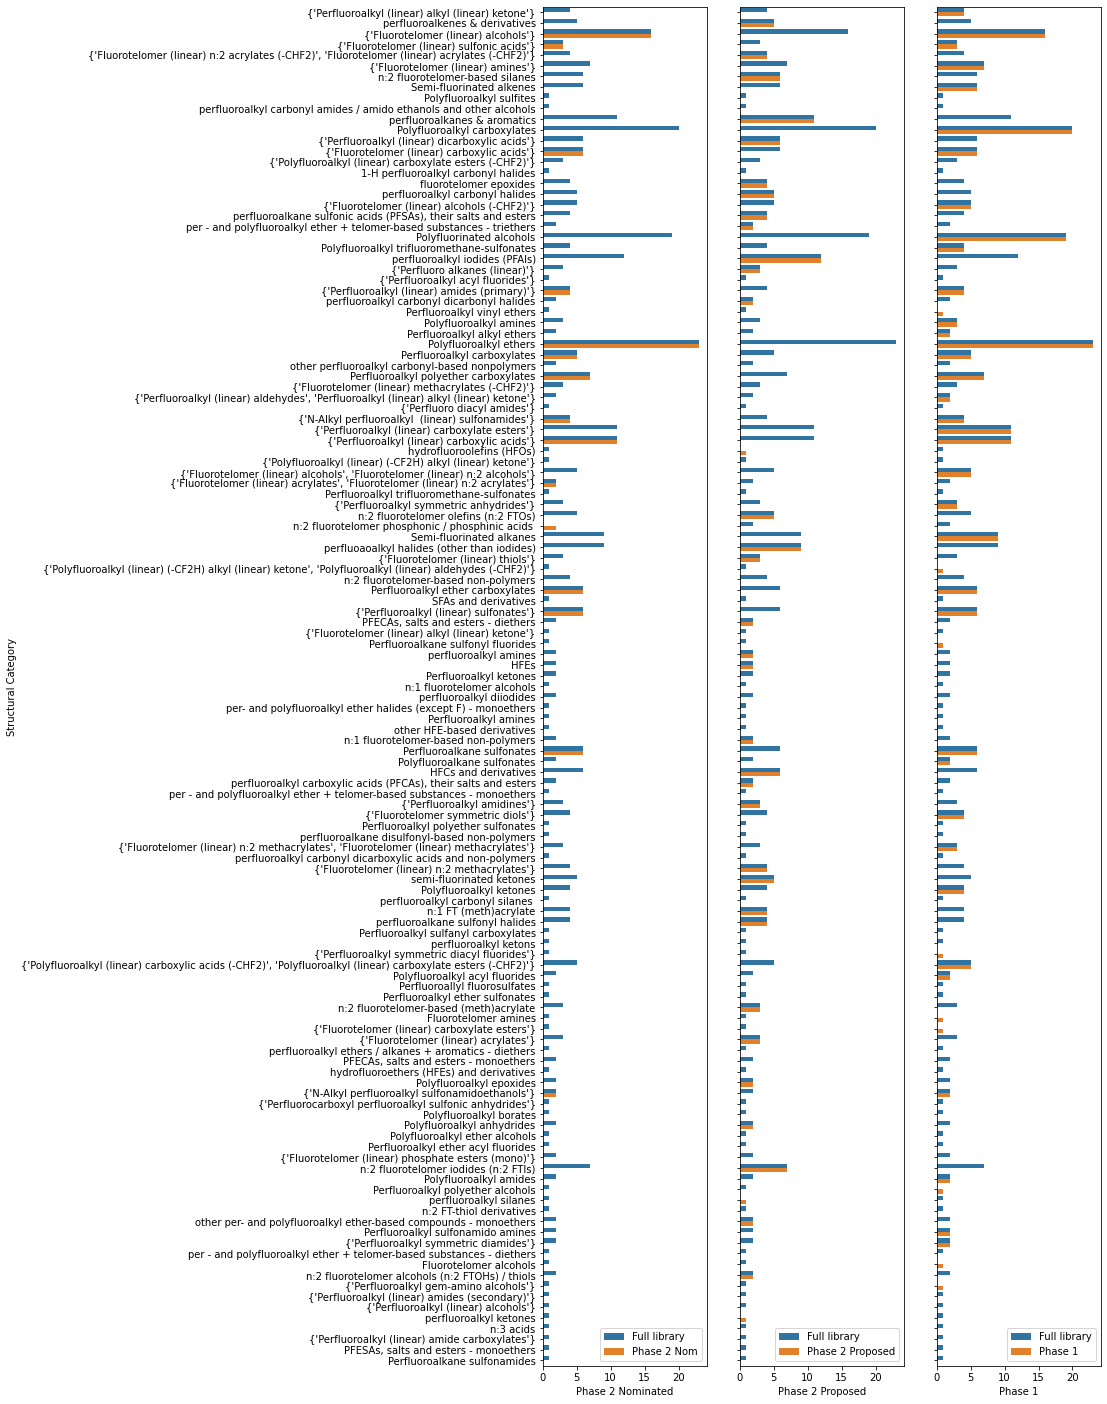

In [36]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(10,25), sharey = True)


ax1 = sns.barplot(x = 'Category_Membership_count', y = 'Final_Structural_Category', hue = 'Nominated for EPAPFAS75S2',data = phase2_final, ax = ax1)
ax2 = sns.barplot(x = 'Category_Membership_count', y = 'Final_Structural_Category', hue = 'Phase2_proposals',data = phase2_final, ax = ax2)
ax3 = sns.barplot(x = 'Category_Membership_count', y = 'Final_Structural_Category', hue = 'EPAPFAS75S1',data = phase2_final, ax= ax3)
ax1.set_ylabel('Structural Category')
ax2.set_ylabel('')
ax3.set_ylabel('')


ax1.set_xlabel('Phase 2 Nominated')
ax2.set_xlabel('Phase 2 Proposed')
ax3.set_xlabel('Phase 1')
h, l = ax1.get_legend_handles_labels()
ax1.legend(h, ['Full library', 'Phase 2 Nom'] , loc = 'lower right')


h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h2, ['Full library', 'Phase 2 Proposed'] , loc = 'lower right')

h3, l3 = ax3.get_legend_handles_labels()
ax3.legend(h3, ['Full library', 'Phase 1'] , loc = 'lower right')

plt.savefig(figures_dir+'Figure2_030622.png', dpi = 300, bbox_inches='tight');